In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
import statsmodels.api as st
from statsmodels.stats import outliers_influence
import random
from sklearn.utils import shuffle
import math
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
import pickle

In [2]:
data=pd.read_csv(r"E:\proge bank gharz\new_train.csv")


In [3]:
data.count()

age            32950
job            32950
marital        32950
education      32950
default        32950
housing        32950
loan           32950
contact        32950
month          32950
day_of_week    32950
duration       32950
campaign       32950
pdays          32950
previous       32950
poutcome       32950
y              32950
dtype: int64

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [5]:
data["log_dur"]=np.log10(data.duration)

C:\Users\HP 250\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
data["y"].replace("yes",1,inplace=True)
data["y"].replace("no",0,inplace=True)

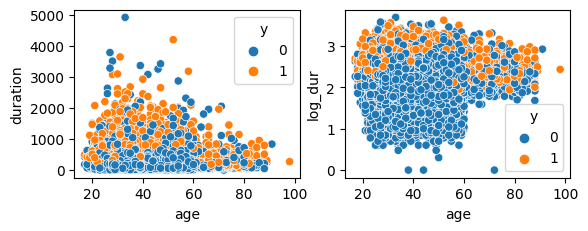

In [7]:
plt.subplot(2,2,1)
sbn.scatterplot(x=data.age,y=data.duration,hue=data.y)
plt.subplot(2,2,2)
sbn.scatterplot(x=data.age,y=data.log_dur,hue=data.y)
plt.show()

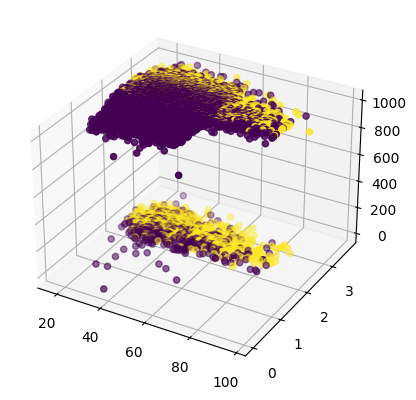

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age,data.log_dur,data.pdays, c=data['y'])

plt.show()

In [9]:
data=data[data["log_dur"]!=0]
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)

C:\Users\HP 250\AppData\Local\Temp\ipykernel_13784\920333267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\HP 250\AppData\Local\Temp\ipykernel_13784\920333267.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
C:\Users\HP 250\AppData\Local\Temp\ipykernel_13784\920333267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [10]:
data=shuffle(data)

In [11]:
data.count()

age            32947
job            32947
marital        32947
education      32947
default        32947
housing        32947
loan           32947
contact        32947
month          32947
day_of_week    32947
duration       32947
campaign       32947
pdays          32947
previous       32947
poutcome       32947
y              32947
log_dur        32947
dtype: int64

In [12]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,log_dur
31274,53,blue-collar,married,basic.9y,no,no,yes,telephone,apr,fri,26,1,999,1,failure,0,1.414973
17647,42,blue-collar,divorced,basic.4y,no,no,no,telephone,may,fri,181,4,999,0,nonexistent,0,2.257679
15463,32,admin.,married,high.school,no,no,no,cellular,aug,thu,876,1,999,0,nonexistent,1,2.942504
14198,44,technician,single,university.degree,no,yes,no,telephone,jul,wed,185,2,999,0,nonexistent,0,2.267172
21642,33,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,fri,8,4,999,0,nonexistent,0,0.903090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,46,blue-collar,married,basic.9y,no,yes,no,telephone,may,tue,220,6,999,0,nonexistent,0,2.342423
6703,29,blue-collar,divorced,basic.4y,no,no,no,telephone,may,tue,231,1,999,0,nonexistent,0,2.363612
13155,43,admin.,married,professional.course,unknown,no,no,cellular,jul,thu,127,3,999,0,nonexistent,0,2.103804
13011,53,retired,married,basic.9y,unknown,yes,no,cellular,jul,fri,181,2,999,0,nonexistent,0,2.257679


In [13]:
x=data[["log_dur","pdays","age"]]
y=data.y

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
svm_predictor=svm.SVC(kernel='linear')

In [17]:
svm_predictor.fit(x_train,y_train)

SVC(kernel='linear')

In [18]:
predic=svm_predictor.predict(x_test)

In [20]:

accuracy_score(y_test,predic)

0.9039453717754173

In [22]:
with open ("model_svm","wb") as file:
    pickle.dump(svm_predictor,file)